In [258]:
import numpy as np
from sklearn.cluster import KMeans
import csv 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [259]:
training_data = pd.read_csv("data_set.csv", index_col=0).as_matrix() + 1 # add one smoothing
training_labels = pd.read_csv("data_set.csv", usecols=[0]).as_matrix()

In [260]:
"""tree_average = linkage(training_data,'complete','cosine') 

fig = plt.figure(figsize=(20,25))

ax = fig.add_subplot(313)
ax.set_title('Complete linkage', fontsize=25)
dendrogram(tree_average, labels=training_labels, orientation= 'right',  leaf_font_size = 12, ax = ax);

plt.tight_layout()"""

"tree_average = linkage(training_data,'complete','cosine') \n\nfig = plt.figure(figsize=(20,25))\n\nax = fig.add_subplot(313)\nax.set_title('Complete linkage', fontsize=25)\ndendrogram(tree_average, labels=training_labels, orientation= 'right',  leaf_font_size = 12, ax = ax);\n\nplt.tight_layout()"

In [261]:
# Use principal component to reduce dimensions of data onto a single plane
pca = PCA(n_components=2, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
X_pca = pca.fit_transform(training_data)

# perform k-means clustering on the data to classify them into distinct groupings
number_clusters = 5
kmeans = KMeans(n_clusters=number_clusters, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto').fit(X_pca)

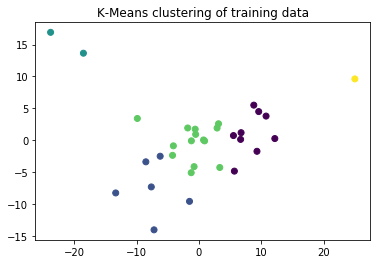

In [262]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_.astype(float))
plt.title("K-Means clustering of training data");

In [263]:
cluster_labels = kmeans.labels_

dict_area_clusters = {}
for i in range (0, number_clusters):
    dict_area_clusters[i] = []
    
# add the location labels to a dictionary entry for its cluster along with the average of its columns
for i in range (0, (len(cluster_labels))):
    dict_area_clusters[cluster_labels[i]].append([training_labels[i][0], np.sum(training_data[i])/len(training_data[i])])
    
# print names of location in each cluster and the average of each cluster
for key, value in dict_area_clusters.items():
    print(key)
    sum = 0
    for i in range(0,len(value)):
        sum = sum + value[i][1]
        print(value[i][0])
    print("%.2f" % (sum/len(value)))
    print()

0
Aberdeen City
Clackmannanshire
Dundee City
Falkirk
Fife
North Ayrshire
North Lanarkshire
South Ayrshire
West Dunbartonshire
23.86

1
Aberdeenshire
Argyll and Bute
East Lothian
Midlothian
Moray
Shetland Islands
18.85

2
East Dunbartonshire
East Renfrewshire
13.40

3
Angus
City of Edinburgh
Dumfries and Galloway
East Ayrshire
Highland
Inverclyde
Na h-Eileanan Siar
Orkney Islands
Perth and Kinross
Renfrewshire
Scottish Borders
South Lanarkshire
Stirling
West Lothian
20.67

4
Glasgow City
29.15



In [264]:
# get data with empty columns to predict clusterings
test_data = pd.read_csv("test_data.csv", index_col=0).as_matrix() + 1 # add one smoothing
labels = pd.read_csv("test_data.csv", usecols=[0]).as_matrix()

In [265]:
# make predictions on test data
Y_pca = pca.fit_transform(test_data)
test_group = kmeans.predict(Y_pca)
test_group 

array([2, 4])

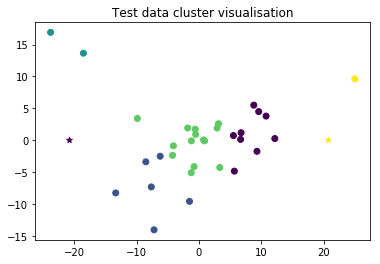

In [266]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_.astype(float))
plt.scatter(Y_pca[:,0], Y_pca[:,1], marker='*', c=test_group.astype(float))
plt.title("Test data cluster visualisation");

In [267]:
# based on averages say if good